# Linear Regression Error

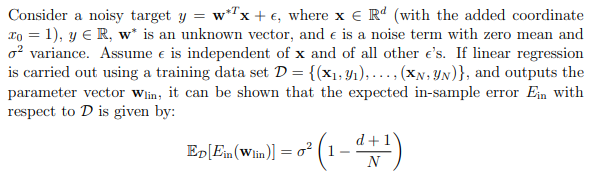

## Question 1:

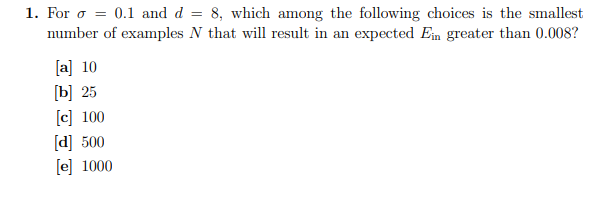

Correct Answer: **C**

Can solve this directly:

$$
\sigma^2\left(1 - \frac{d+1}{N}\right) > 0.008 \implies (0.1)^2\left(1 - \frac{9}{N}\right) > 0.008 \implies N > 45
$$

# Nonlinear Transforms

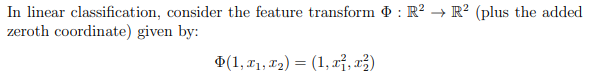

## Question 2:

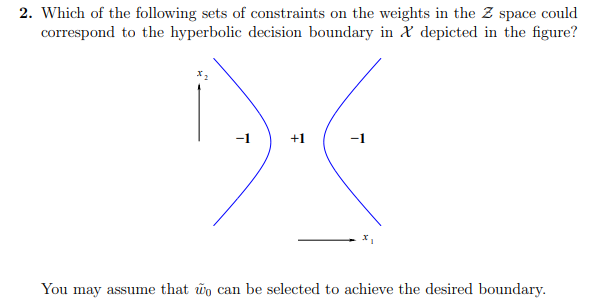

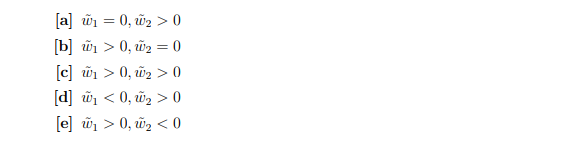

Correct Answer: **D**

The blue boundary curve in this question corresponds to the general hyperbolic curve equation:

$$
\frac{x_1^2}{a^2} - \frac{x_2^2}{b^2} - 1 = 0
$$

Since we want the inside points to map to +1 we can multiply by -1 and consider the following model:

$$
\text{sign}\left(-\frac{x_1^2}{a^2} + \frac{x_2^2}{b^2} + 1\right)
$$

In this case when we want $\tilde{w_1}<0$ and $\tilde{w_2}>0$

## Question 3:

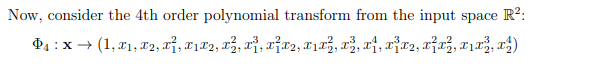

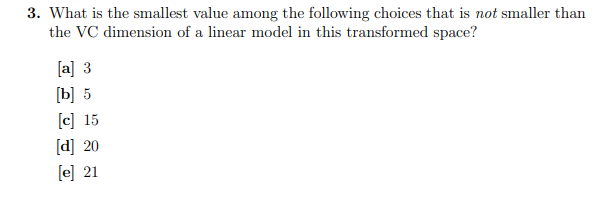

Correct Answer: **C**

From the lectures if $(x_0,\cdots ,x_d) \longmapsto (z_0,\cdots ,z_{\tilde{d}})$, then $d_{VC} = \tilde{d}+1$. In particular we have $\tilde{d} = 14$ so $d_{VC} = 15$

# Gradient Descent

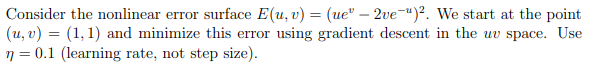

## Question 4:

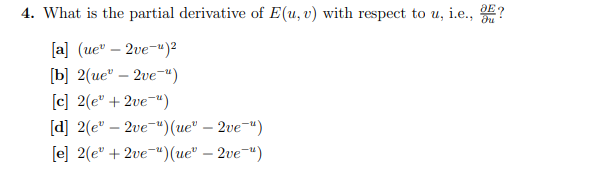

Correct Answer **E** 

Chain rule application

## Question 5:

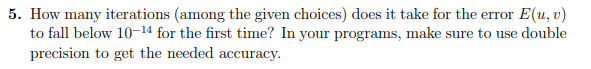

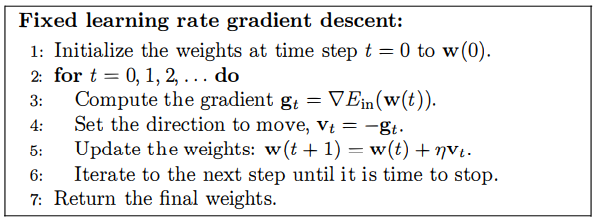

In [2]:
import numpy as np

#initial (u,v) = (1,1)
eta = .1

w = np.array([1.0,1.0], dtype=np.longfloat)

def err(x):
    u = x[0]
    v = x[1]
    error = (u*np.exp(v)-2*v*np.exp(-1*u))**2
    return error

def grad(x):
    u = x[0]
    v = x[1]
    grad_1 = 2*(np.exp(v)+2*v*np.exp(-1*u))*(u*np.exp(v)-2*v*np.exp(-1*u)) #grad_u
    grad_2 = 2*(u*np.exp(v)-2*np.exp(-1*u))*(u*np.exp(v)-2*v*np.exp(-1*u)) #grad_v
    
    return np.array([grad_1,grad_2], dtype=np.longfloat)

error = err(w)
print(f'initial error = {error}')
num = 0

while error > 10**(-14) and num<100000:
    num += 1
    #compute gradient
    
    move_vect = grad(w)*eta
    #print(move_vect)
        
    #update weights
    w = w-move_vect
    error = err(w)
    
    print(f'new w = {w}, error = {error}')
    
print(f'final weights = {w}, error = {error}, num = {num}')


initial error = 3.9303972318771003
new w = [-0.36954299  0.21392055], error = 1.1595097299694377
new w = [ 0.03052069 -0.50793405], error = 1.0074074829626989
new w = [ 0.10752311 -0.12221026], error = 0.09900912162725588
new w = [ 0.06564483 -0.01516656], error = 0.00866064536281213
new w = [0.04784117 0.0184899 ], error = 0.00018175579172801659
new w = [0.04499946 0.02349925], error = 1.2972398478441872e-06
new w = [0.04475602 0.0239243 ], error = 7.291524698457968e-09
new w = [0.04473775 0.02395617], error = 4.0099978905617125e-11
new w = [0.04473639 0.02395854], error = 2.2016834484097367e-13
new w = [0.04473629 0.02395871], error = 1.2086833944220747e-15
final weights = [0.04473629 0.02395871], error = 1.2086833944220747e-15, num = 10


Correct Answer: **D**

(10 Iterations)

## Question 6:

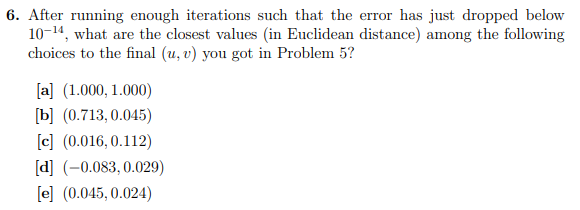

Correct Answer: **E**

## Question 7:

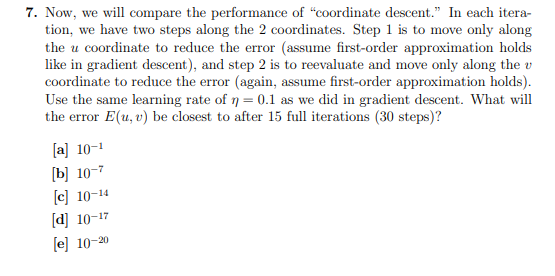

In [4]:
#Coordinate descent

import numpy as np

#initial (u,v) = (1,1)
eta = .1

w = np.array([1.0,1.0], dtype=np.longfloat)

def err(x):
    u = x[0]
    v = x[1]
    error = (u*np.exp(v)-2*v*np.exp(-1*u))**2
    return error

def grad(x):
    u = x[0]
    v = x[1]
    grad_1 = 2*(np.exp(v)+2*v*np.exp(-1*u))*(u*np.exp(v)-2*v*np.exp(-1*u)) #grad_u
    grad_2 = 2*(u*np.exp(v)-2*np.exp(-1*u))*(u*np.exp(v)-2*v*np.exp(-1*u)) #grad_v
    
    return np.array([grad_1,grad_2], dtype=np.longfloat)

error = err(w)
print(f'initial error = {error}')
num = 0

while num<15:
    #compute gradient
    
    #step 1 - move along u direction
    move_vect = grad(w)*eta
    
    #update weights in 1st coord
    w[0] -= move_vect[0]
        
    #step 2 - move along v direction
    move_vect = grad(w)*eta
    w[1] -= move_vect[1]
    
    num += 1
    
error = err(w)
print(f'final weights = {w}, error = {error}, num = {num}')

initial error = 3.9303972318771003
final weights = [ 6.2970759  -2.85230695], error = 0.13981379199615315, num = 15


Correct Answer: **A** (closest to $10^{-1}$)

# Logistic Regression

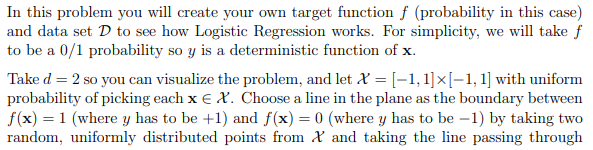

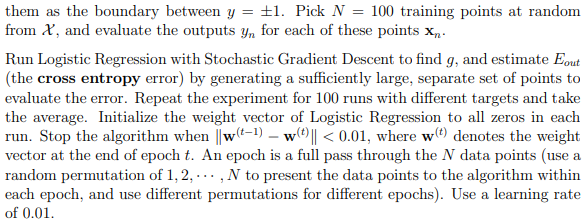

In [219]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

eta = 0.01 #learning rate
errs = []
epoch_counts = []

for run in range(100):

    # generate target function
    pts = np.random.uniform(-1,1,(2,2)) #each row is a new pt
    flip = np.random.rand() > 0.5
    coefficients = np.polyfit(pts[:,0],pts[:,1],1) #format is (x-cords,y-cords,degree)
    x = np.linspace(-1,1,100)
    y = coefficients[1] + coefficients[0]*x

#     def setup_draw():
#         fig, ax = plt.subplots()
#         ax.plot(pts[0,0],pts[0,1],color='black', marker='o') #pt 1
#         ax.plot(pts[1,0],pts[1,1],color='black', marker='o') #pt 2
#         ax.plot(x,y,'m--')
#         if flip:
#             ax.fill_between(x, y, 1, color='red', alpha=.2)
#             ax.fill_between(x, -1, y, color='blue', alpha=.2)
#         else:
#             ax.fill_between(x, y, 1, color='blue', alpha=.2)
#             ax.fill_between(x, -1, y, color='red', alpha=.2)        
#         ax.set(xlabel='x', ylabel='y', title='target function y={:.2f}+{:.2f}x'.format(coefficients[1],coefficients[0]))
#         ax.set_xlim(-1,1)
#         ax.set_ylim(-1,1)
#         plt.show()
#     setup_draw()

    # generate training set
    N = 100 # number of training pts
    def eval_func(X):
        labels = []
        N = X.shape[0]
        for row in range(N):
            predicted_height = coefficients[1] + coefficients[0]*X[row,0]
            actual_height = X[row,1]
            label = np.sign(actual_height-predicted_height)
            #print(label)        
            labels.append(label)
        return np.array(labels)

    train_pts = np.random.uniform(-1,1,(N,2))
    train_pts_labels = eval_func(train_pts)
    if flip:
        train_pts_labels *= -1
    X = np.hstack((np.ones((N,1)),train_pts))

#     colors=['red','blue']
#     def train_set_draw():
#         plt.scatter(train_pts[:,0],train_pts[:,1],s=2, c=train_pts_labels, cmap=matplotlib.colors.ListedColormap(colors))
#         plt.plot(x,y,'m--')
#         plt.xlim(-1, 1)
#         plt.ylim(-1, 1)
#         plt.title('Training set')
#         plt.show()
#     train_set_draw()

    # Logistic regression (with SGD)

    w = np.array([0.,0.,0.]) # initialize weights to 0
    stop = False #this will trigger the end to the alg (when difference between weights is less than 0.01)
    epochs = 0

    #the gradient function we are using
    def grad(X,w,index):
        denom = 1 + np.exp(train_pts_labels[index]*np.dot(w,X[index,:]))
        return -1*(train_pts_labels[index]*X[index,:])/denom

    #cross entropy function (calculates out of sample error)
    def cross_entropy_error(x_s,y_s,w,num):
        err_sum = 0
        for index in range(num):
            err_sum += np.log(1+np.exp(-1*y_s[index]*np.dot(w,x_s[index,:])))
        return err_sum/num

    while stop != True and epochs<1000:
        #SGD Algorithm

        #generate random sampling
        index_order = list(range(N))
        random.shuffle(index_order)

        start_weights = np.copy(w)

        for index in index_order:
            change_in_w = grad(X,w,index)
            w = w - eta*change_in_w            

        end_weights = np.copy(w)

        #check for termination of algorithm
        if np.linalg.norm(end_weights-start_weights)<0.01:
            stop = True

        epochs += 1

    test_pts = np.random.uniform(-1,1,(10*N,2))
    test_pts_labels = eval_func(test_pts)
    if flip:
        test_pts_labels *= -1
    test_X = np.hstack((np.ones((10*N,1)),test_pts))
    
    epoch_counts.append(epochs)
    errs.append(cross_entropy_error(test_X,test_pts_labels,w,10*N))
    
print(f'Average error over 100 runs = {np.mean(errs)}')
print(f'Average num of epochs over 100 runs = {np.mean(epoch_counts)}')

Average error over 100 runs = 0.10243193159354756
Average num of epochs over 100 runs = 334.6


## Question 8:

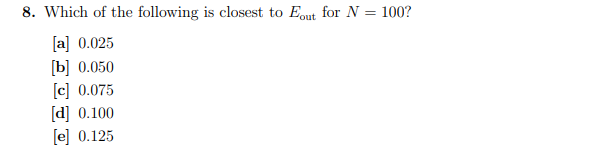

Correct Answer: **D**

## Question 9:

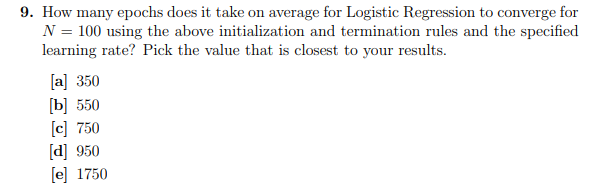

Correct Answer: **A**

# PLA as SGD

## Question 10:

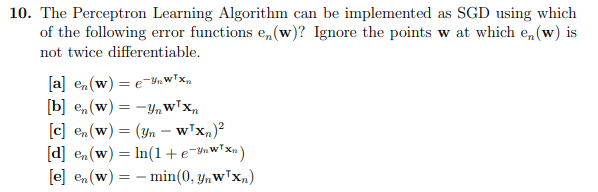

Correct Answer: **E**

If the chosen point is classified correctly then $y_n\mathbf{w}^T\mathbf{x}_n > 0$ and so:

$$
e_n(\textbf{w}) = -\text{min}(0,y_n\mathbf{w}^T\mathbf{x}_n) = 0
$$

In this case we do not update the weights and move on to other points (this is why **B** is incorrect as this option will always update the weights). 

If the chosen point is misclassified then $y_n\mathbf{w}^T\mathbf{x}_n < 0$ and $e_n(\textbf{w}) = -y_n\mathbf{w}^T\mathbf{x}_n$. Taking the gradient and using the learning rate $\eta = 1$ we get the correct update rule for PLA: $\mathbf{w} = \mathbf{w} - y_n\mathbf{x}_n$ 

On the other hand it can be argued that if $\mathbf{w}$ is very large then minimizing $E_{in}$ using SGD is similar to PLA.